# Deskripsi Proyek

membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak.

Datasets: loan_data_2007_2014

## Library

In [52]:
import pandas as pd, numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LogisticRegression

## Pre-Processing

In [2]:
path = '/home/jovyan/work/IDx_Partner/loan_data_2007_2014.csv'

In [3]:
df = pd.read_csv(path,index_col = 0, low_memory=False)

In [4]:
df.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
288526,29715626,32248894,15750,15750,15750.0,60 months,13.35,361.19,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,63000.0,NaN,NaN,NaN


In [5]:
df.shape

(466285, 74)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


### Informasi setiap Fitur

In [8]:
#Melakukan pengecekan value setiap fitur
#yang dicantumkan di notebook ini sebagai contoh saya ambil dari purpose dan grade
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [9]:
df['grade'].value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Selain dari 2 sample di atas, dilakukan juga pengecekan terhadap nilai seluruh fitur yang ada dan didapatkan kesimpulan beberapa kolom yang tidak memiliki value akan di hapus dan hanya fitur yang diperlukan dalam hal modeling yang akan di pertahan kan.

kolom **id** disini akan dijadikan index.

### Menghapus fitur yang tidak diperlukan

Fitur yang akan di gunakan adalah sebagai berikut:

index = id
1. loan_amnt = jumlah peminjaman
2. term = lama nya peminjaman (36 bulan dan 60 bulan)
3. int_rate = suku bunga pinjaman
4. installment = pembayaran bulanan
5. grade = LC menilai pinjaman (A - G)
6. subgrade = subgrade dari pinjaman (_1 - _5)
7. empt_length = lama bekerja (0-10+)
8. home_ownership =status kepemilikan rumah
9. annual_inc = pendapatan tahunan
10. loan_status = status pinjaman saat ini
11. purpose = kepentingan pinjaman
12. addr_state = negara dari peminjam
13. dti = Rasio dari hutang bulanan terhadap total utang dibagi dengan pendapatan bulanan
14. delinq_2yrs = Jumlah insiden tunggakan selama lebih dari 30 hari dalam catatan kredit peminjam selama 2 tahun terakhir.
15. inq_last_6mths
16. open_acc = Jumlah garis kredit yang masih aktif dalam catatan kredit peminjam.
17. pub_rec = Jumlah catatan publik yang merugikan
18. revol_bal = Total saldo kredit yang dapat diputar
19. initial_list_status = Status penulisan awal dari pinjaman. Nilai yang mungkin adalah - "Whole" (Utuh) atau "Fractional" (Fraksional).
20. collection_recovery_fee = biaya penagihan setelah hutang di-charge off
21. acc_now_delinq = Jumlah akun di mana peminjam saat ini mengalami keterlambatan pembayaran.

In [10]:
columns = ['id','loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade',
           'emp_length', 'home_ownership', 'annual_inc','loan_status','purpose','addr_state','dti',
           'delinq_2yrs','inq_last_6mths','open_acc', 
           'pub_rec', 'revol_bal','initial_list_status','collection_recovery_fee',
           'acc_now_delinq']

In [11]:
df_model = df[columns].set_index('id')
df_model.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,initial_list_status,collection_recovery_fee,acc_now_delinq
id,,,,,,,,,,,,,,,,,,,,,
29565170,1500,36 months,15.61,52.45,D,D1,3 years,RENT,65000.0,Late (16-30 days),...,NC,20.42,0.0,0.0,11.0,0.0,7309,w,0.0,0.0


### Memperbaiki nilai

#### term

In [12]:
#cek value dari term
df_model['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
# merubah nilai dari str ke int
df_model['term'] = df_model['term'].str.replace('months', '').astype(int)

In [14]:
df_model['term'].unique()

array([36, 60])

##### emp_length

In [15]:
#cek value dari emp_length
df_model['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
#mengubah nilai nan dan <1 year menjadi 0 sesuai ketentuan LCDataDictionary RejectStats
df_model.loc[(df_model['emp_length'].isna()) | (df_model['emp_length'] == '< 1 year'),'emp_length']= 0

In [17]:
#mengubah tipe data emp__length dari string menjadi integer
df_model['emp_length'] = df_model['emp_length'].apply(lambda x: re.findall('([0-9]+)',str(x))[0]).astype(int)

In [18]:
df_model['emp_length'].value_counts()

10    150049
0      57273
2      41373
3      36596
5      30774
1      29622
4      28023
7      26180
6      26112
8      22395
9      17888
Name: emp_length, dtype: int64

emp_length adalah Panjang pekerjaan dalam beberapa tahun. Nilai yang mungkin adalah antara 0 sampai 10 di mana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih.

##### anual_inc

In [19]:
#Cek jumlah nilai yang hilang
df_model['annual_inc'].isna().sum()

4

In [20]:
#menghapus baris yang memiliki nilai hilang di annual_inc
df_model = df_model.dropna(subset = ['annual_inc'])

Dikarenakan jumlah missing value dari annual_inc relatif kecil dan penghapusan ini tidak mengurangi representativitas dataset secara signifikan.

##### home_ownership

In [21]:
#unique value dari ownership
df_model['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [22]:
df_model['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            46
ANY              1
Name: home_ownership, dtype: int64

In [23]:
#merubah nilai None dan ANY menjadi OTHER
df_model.loc[(df_model['home_ownership'] == 'NONE') | 
       (df_model['home_ownership'] == 'ANY'),'home_ownership']= 'OTHER'

Dikarenakan nilai NONE dan ANY hanya berjumlah sedikit dan cenderung memiliki makna yang hampir mirip dengan OTHER, oleh karena itu nilai tersebut digabungkan menjadi OTHER.

##### Loan Status

Rincian skor kredit berdasarkan BI Checking:
1. Skor 1: Kredit Lancar, artinya debitur selalu memenuhi kewajibannya untuk membayar cicilan setiap bulan beserta bunganya hingga lunas tanpa pernah menunggak.
2. Skor 2: Kredit DPK atau Kredit dalam Perhatian Khusus, artinya debitur tercatat menunggak cicilan kredit 1-90 hari
3. Skor 3: Kredit Tidak Lancar, artinya debitur tercatat menunggak cicilan kredit 91-120 hari
4. Skor 4: Kredit Diragukan, artinya debitur tercatat menunggak cicilan kredit 121-180 hari
5. Skor 5: Kredit Macet, artinya debitur tercatat menunggak cicilan kredit lebih 180 hari.

In [24]:
df_model['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1984
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Dari keterangan loan status di dapat 
1. skor 1 = Current dan Fully Paid
2. skor 2 = In Grace Period , Late (16-30 days)
3. skor 3 = Late (31-120 days),Does not meet the credit policy. Status:Fully Paid
4. skor 4 = Charged Off, Does not meet the credit policy. Status:Charged Off 
5. skor 5 = Default

In [25]:
#Merubah Loan status berdasarkan ketentuan di atas dan akan menjadi target dari model kita
mapping = {
    'Current' : 1, 'Fully Paid' : 1,
    'In Grace Period': 2, 'Late (16-30 days)': 2,
    'Late (31-120 days)': 3, 'Does not meet the credit policy. Status:Fully Paid' : 3,
    'Charged Off': 4, 'Does not meet the credit policy. Status:Charged Off' : 4,
    'Default' : 5
}
df_model['loan_status'] = df_model['loan_status'].replace(mapping)

In [26]:
df_model['loan_status'].value_counts()

1    408965
4     43236
3      8884
2      4364
5       832
Name: loan_status, dtype: int64

##### deling_2yrs

In [27]:
df_model[df_model['delinq_2yrs'].isna()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,initial_list_status,collection_recovery_fee,acc_now_delinq
id,,,,,,,,,,,,,,,,,,,,,
71823,4350,36,8.07,136.45,A,A4,0,RENT,120000.0,3,...,MA,4.00,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
72197,3900,36,9.33,124.62,B,B3,0,RENT,98000.0,3,...,NY,10.00,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
73003,3200,36,9.96,103.20,B,B5,0,MORTGAGE,150000.0,3,...,MA,10.00,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
72819,7200,36,10.28,164.42,C,C1,0,RENT,95000.0,3,...,NY,10.00,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
91023,1900,36,9.64,61.00,B,B4,1,MORTGAGE,100000.0,3,...,FL,10.00,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
85961,1200,36,9.01,38.17,B,B2,0,RENT,36000.0,3,...,TX,3.27,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
85818,5000,36,11.22,164.23,C,C4,0,RENT,28000.0,3,...,NJ,3.51,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
85781,1400,36,10.91,45.78,C,C3,0,RENT,40000.0,3,...,MO,8.61,NaN,NaN,NaN,NaN,0,f,0.0000,NaN
85675,1000,36,14.07,34.21,E,E3,10,RENT,25000.0,3,...,NJ,16.27,NaN,NaN,NaN,NaN,0,f,0.0000,NaN


In [28]:
#menghapus baris yang memiliki nilai hilang di kolom deling_2yrs
df_model = df_model.dropna(subset = ['delinq_2yrs'])

Dikarenakan jumlah missing value dari delinq_2yrs relatif kecil dan penghapusan ini tidak mengurangi representativitas dataset secara signifikan.

## Eksplorasi Data Analisis

In [29]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466256 entries, 1077501 to 9199665
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466256 non-null  int64  
 1   term                     466256 non-null  int64  
 2   int_rate                 466256 non-null  float64
 3   installment              466256 non-null  float64
 4   grade                    466256 non-null  object 
 5   sub_grade                466256 non-null  object 
 6   emp_length               466256 non-null  int64  
 7   home_ownership           466256 non-null  object 
 8   annual_inc               466256 non-null  float64
 9   loan_status              466256 non-null  int64  
 10  purpose                  466256 non-null  object 
 11  addr_state               466256 non-null  object 
 12  dti                      466256 non-null  float64
 13  delinq_2yrs              466256 non-null  float64
 1

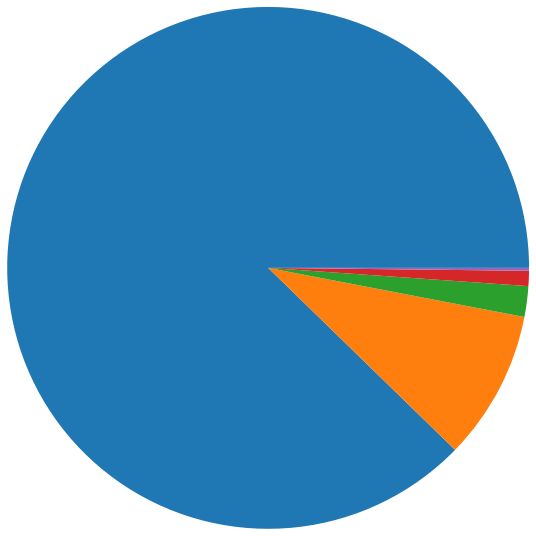

In [30]:
fig, ax = plt.subplots()
ax.pie(df_model['loan_status'].value_counts().values, radius=3, center=(4, 4),)

plt.show()

In [31]:
df_model['loan_status'].value_counts().index

Int64Index([1, 4, 3, 2, 5], dtype='int64')

## Modeling

### Data Modeling

In [32]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466256 entries, 1077501 to 9199665
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466256 non-null  int64  
 1   term                     466256 non-null  int64  
 2   int_rate                 466256 non-null  float64
 3   installment              466256 non-null  float64
 4   grade                    466256 non-null  object 
 5   sub_grade                466256 non-null  object 
 6   emp_length               466256 non-null  int64  
 7   home_ownership           466256 non-null  object 
 8   annual_inc               466256 non-null  float64
 9   loan_status              466256 non-null  int64  
 10  purpose                  466256 non-null  object 
 11  addr_state               466256 non-null  object 
 12  dti                      466256 non-null  float64
 13  delinq_2yrs              466256 non-null  float64
 1

In [62]:
df_ml.sample()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
id,,,,,,,,,,,,,,,,,,,,,
21149585,10000,36,11.67,330.57,6,86000.0,1,21.52,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df_ml[df_ml.columns[:20]]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,collection_recovery_fee,acc_now_delinq,grade_A,grade_B,grade_C,grade_D,grade_E
id,,,,,,,,,,,,,,,,,,,,
1077501,5000,36,10.65,162.87,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648,0.00,0.0,0,1,0,0,0
1077430,2500,60,15.27,59.83,0,30000.0,4,1.00,0.0,5.0,3.0,0.0,1687,1.11,0.0,0,0,1,0,0
1077175,2400,36,15.96,84.33,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956,0.00,0.0,0,0,1,0,0
1076863,10000,36,13.49,339.31,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598,0.00,0.0,0,0,1,0,0
1075358,3000,60,12.69,67.79,1,80000.0,1,17.94,0.0,0.0,15.0,0.0,27783,0.00,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8598660,18400,60,14.47,432.64,4,110000.0,1,19.85,0.0,2.0,18.0,0.0,23208,0.00,0.0,0,0,1,0,0
9684700,22000,60,19.97,582.50,10,78000.0,4,18.45,0.0,5.0,18.0,1.0,18238,0.00,0.0,0,0,0,1,0
9584776,20700,60,16.99,514.34,7,46000.0,1,25.65,0.0,2.0,18.0,0.0,6688,0.00,0.0,0,0,0,1,0


In [66]:
df_ml[10:20]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
id,,,,,,,,,,,,,,,,,,,,,
1070078,6500,60,14.65,153.45,5,72000.00,1,16.12,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1069908,12000,36,12.69,402.54,10,75000.00,1,10.78,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1064687,9000,36,13.49,305.38,0,30000.00,4,10.08,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
1069866,3000,36,9.91,96.68,3,15000.00,1,12.56,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1069057,10000,36,10.65,325.74,3,100000.00,4,7.06,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1069759,1000,36,16.29,35.31,0,28000.00,1,20.31,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1065775,10000,36,15.27,347.98,4,42000.00,1,18.60,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1069971,3600,36,6.03,109.57,10,110000.00,1,10.52,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1062474,6000,36,11.71,198.46,1,84000.00,1,18.44,2.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [44]:
feature_object = ['grade','sub_grade','home_ownership','purpose','addr_state','initial_list_status']

df_ml = pd.get_dummies(df_model,columns=feature_object)

df_ml.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       ...
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_f', 'initial_list_status_w'],
      dtype='object', length=127)

In [47]:
#Memisahkan data fitur dan target
X = df_ml.drop(columns='loan_status',axis=1)
y = df_ml['loan_status']

In [59]:
# Split data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f'jumlah ukuran X_train {X_train.shape}')
print(f'jumlah ukuran X_test {X_test.shape}')
print(f'jumlah ukuran y_train {y_train.shape}')
print(f'jumlah ukuran y_test {y_test.shape}')

jumlah ukuran X_train (326379, 126)
jumlah ukuran X_test (139877, 126)
jumlah ukuran y_train (326379,)
jumlah ukuran y_test (139877,)


### Latih model

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()